# Table of Content <a id='toc'></a>


&nbsp;&nbsp;&nbsp;&nbsp;[1. probability distributions](#0)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 01](#1)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 02](#2)

&nbsp;&nbsp;&nbsp;&nbsp;[2. Statistical hypothesis testing](#3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1 t-test : difference between two means](#4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2 t-test assumptions and what to do when they are not respected](#5)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2.1 testing normality](#6)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2.2 nonparametric testing : Mann–Whitney U test](#7)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3 p-value, power and errors](#8)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3.1 errors of type I and II](#9)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3.2 P-values](#10)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3.3 power](#11)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 03](#12)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4 BONUS : multiple testing](#13)


[back to the toc](#toc)

<br>

# 1. probability distributions  <a id='0'></a>


In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import scipy.stats as stats 
import pandas as pd
import numpy as np

## what is a probability distribution ?

A probability distribution represents the different values that a *random variable* might take and associates a specific probability each of them.

They are most commonly represented by plotting their **Probability mass/density function (pdf)**: horizontal axis represents possible values, vertical axis represents probabilities of obtaining these values (discrete) or the probability density at each value (continuous).

An important property of probability distribution is that they sum to 1. 
This is quite apparent when plotting the **cumulative mass/density function (cdf)** of a distribution.

Text(0.5, 1.0, 'binomial law - cumulative probability mass function')

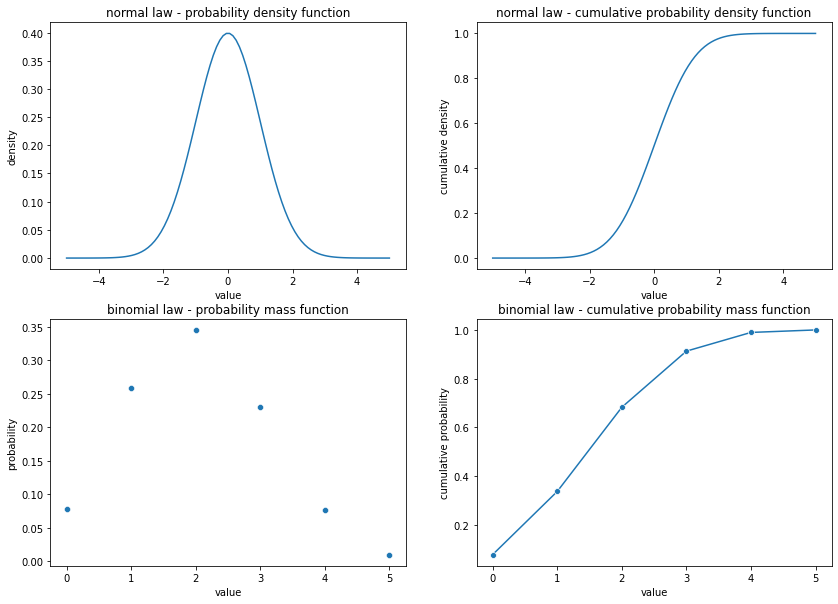

In [2]:
f, axes = plt.subplots(2, 2, figsize=(14, 10) )

# standard normal distribution
x = np.linspace(-5, 5, 100) # 100 equally separated points between -5 and 5
a= sns.lineplot(x=x, y=stats.norm.pdf(x) , ax = axes[0,0])
a.set(xlabel='value', ylabel='density')
a.set_title('normal law - probability density function')
a=sns.lineplot(x=x, y=stats.norm.cdf(x) , ax = axes[0,1])
a.set(xlabel='value', ylabel='cumulative density')
a.set_title('normal law - cumulative probability density function')

# binomial distribution
n, p = 5, 0.4 # parameters of the binomial distribution
x = list(range(n+1)) # all integers from 0 to n, included.
a=sns.scatterplot(x=x, y=stats.binom.pmf(x,n,p) , ax = axes[1,0])
a.set(xlabel='value', ylabel='probability')
a.set_title('binomial law - probability mass function')
a=sns.lineplot(x=x, y=stats.binom.cdf(x,n,p) , marker="o",  ax = axes[1,1])
a.set(xlabel='value', ylabel='cumulative probability' )
a.set_title('binomial law - cumulative probability mass function')


Most distributions have a certain number of **parameters** which may control their overall **shape, location or scale**.

For Instance the normal law has two parameters : its mean ($\mu$) and its standard deviation ($\sigma$), which respectively control its location and scale.

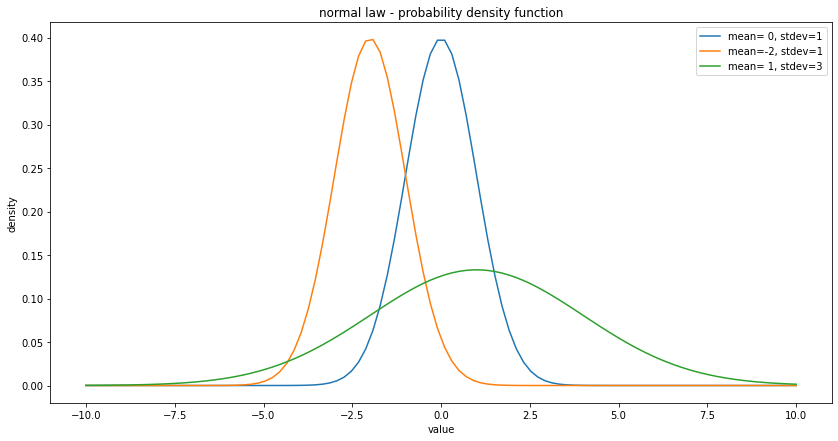

In [3]:
x = np.linspace(-10,10, 100) # 100 equally separated points between -5 and 5
fig, ax = plt.subplots(figsize=(14, 7))

a=sns.lineplot(x=x, y=stats.norm.pdf(x , loc = 0 , scale = 1), ax = ax, label='mean= 0, stdev=1')
sns.lineplot(  x=x, y=stats.norm.pdf(x , loc = -2, scale = 1), ax = ax, label='mean=-2, stdev=1')
sns.lineplot(  x=x, y=stats.norm.pdf(x , loc = 1 , scale = 3), ax = ax, label='mean= 1, stdev=3')

a.set(xlabel='value', ylabel='density')
a.set_title('normal law - probability density function')
ax.legend()

What is of particular interest to us here is that 
these theoretical **probability distributions can be used to model 
how a particular random variable would behave under a particular hypothesis**.
This prediction can then be compared to data measured in the world.

To signify that a random variable follows a particular distribution, we use the $\sim$ notation. So if variable $X$ follows a normal distribution of mean $m$ and standard deviation $s$, we write:
$$X \sim N(m , s )$$


## why everyone talks about the normal distribution - confidence interval

It is more than likely that you have heard about the normal distribution and 95% confidence interval. You may also have, in this context, heard about the limit of 1.96, or 2 standard-deviations. 

This relates to a peculiar (and very convenient) property of random variables :
"in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution" (wikipedia)

Consider that, at its core, the mean of a sample is a sum independently drawn realizations of a random variable (normalized by the size of said sample). 
The central limit theorem then implies that **for large samples the mean of a sample of fixed size is a random variable that follows a normal distribution**.

Let's demonstrate:

Text(0.5, 1.0, 'distribution of the means of 100 000 samples')

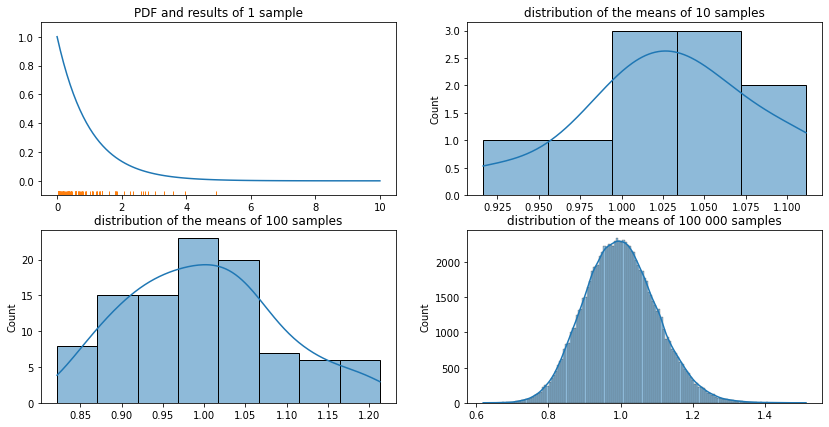

In [7]:
# Say we collect a sample of size 100 in an exponential distribution, and compute the mean of that sample
sampleSize = 100
sampling = lambda sampleSize : np.random.exponential( size = sampleSize) # I define a function for sampling

sample1 = sampling(sampleSize)

# let's repeat this 10 times, and keep only the means
sampleMeans10 = [ sampling(sampleSize).mean() for i in range(10) ]
# now let's repeat this 100 times, and keep only the means
sampleMeans100 = [ sampling(sampleSize).mean() for i in range(100) ]
# now let's repeat this 100 000 times, and keep only the means
sampleMeans100000 = [ sampling(sampleSize).mean() for i in range(100000) ]


## plotting 
fig, axes = plt.subplots(2,2,figsize=(14, 7))
x = np.linspace(0,10, 100)
a= sns.lineplot(x=x, y=stats.expon.pdf(x ) , ax = axes[0,0] )
sns.rugplot( x=sample1 , ax = axes[0,0] )
a.set_title('PDF and results of 1 sample')

a=sns.histplot(sampleMeans10 , kde=True, ax = axes[0,1])
a.set_title('distribution of the means of 10 samples')

a=sns.histplot(sampleMeans100 , kde=True, ax = axes[1,0])
a.set_title('distribution of the means of 100 samples')

a=sns.histplot(sampleMeans100000 , kde=True, ax = axes[1,1])
#a=sns.distplot(x, stats.norm.pdf( x , loc = 0.5 , norm= ) , ax = axes[1,1])
a.set_title('distribution of the means of 100 000 samples')


## OK, but that is just something you did with simulations, does that work on real data ?

let's do the same, with the census data. 
Here we are in the special case were we have the entire population, so we know the **population mean**.

By randomly choosing some cities, we produce a **sample mean**. 

In [6]:
df = pd.read_csv( "data/census1880_fractions.csv" )

population_mean = df["Foreigner"].mean()

sample_mean = np.random.choice( df["Foreigner"] , size=10 ).mean()

print("population mean",population_mean)
print("sample mean",sample_mean)
print("scaled difference between population and sample mean: {:.3f}".format(( population_mean - sample_mean )/population_mean ))

population mean 0.04082937033860135
sample mean 0.0429786949829439
scaled difference between population and sample mean: -0.053


According to the central limit theorem, these sample mean are not completely random : they are spread around the population mean according to a normal law.

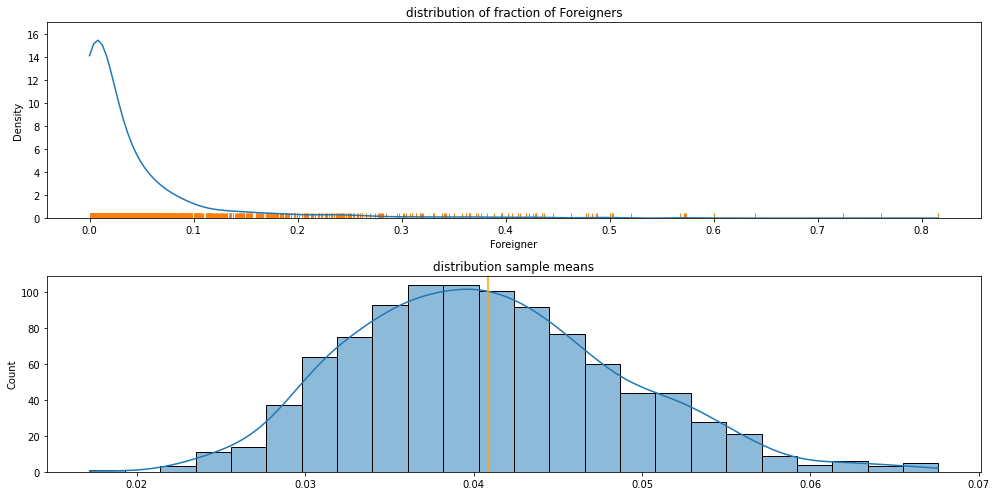

In [7]:
# to make the distribution appear, I create a large number of samples (imagine you have a lot of polls)
sample_means = []
for i in range(1000):
    sample_means.append( np.random.choice( df["Foreigner"] , size=100 ).mean() ) # replace=True by default

## plotting 
fig, axes = plt.subplots(2,1,figsize=(14, 7))
x = np.linspace(0,10, 100)
a= sns.kdeplot(df["Foreigner"], ax = axes[0] , cut=0 )
sns.rugplot( df["Foreigner"] , ax = axes[0] )
a.set_title('distribution of fraction of Foreigners')

a=sns.histplot(sample_means , kde=True ,ax = axes[1])
axes[1].axvline(population_mean , color='orange', label='population mean')
a.set_title('distribution sample means')

plt.tight_layout()

The mean of this normal law is equal to the **mean of the original distribution** and 
its standard deviation that depends on the **standard deviation of the original deviation divided by the square root of $n$**.

Using the notation we introduced earlier this looks like:
$$\bar{x} \sim N(m , s / \sqrt{n} )$$, where $\bar{x}$ is the sample mean, and $m$ $s$ respectively are the mean and the standard deviation of the population.

However, note that **this only works if the sample size is large enough**. 
The central limit theorem let's us perform inferences even when the underlying distribution is unknown, 
but when it is known, we should prefer using the actual original distribution.  

C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figu

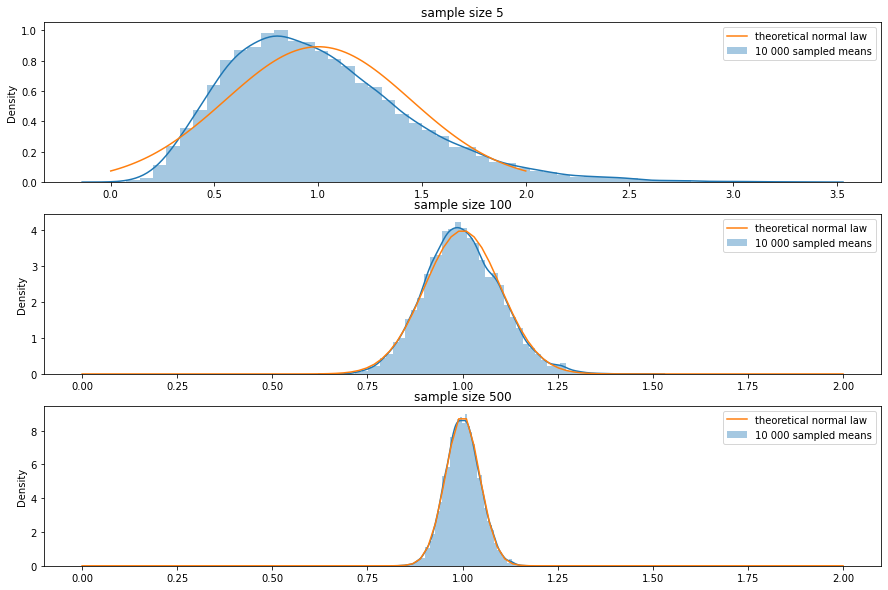

In [8]:
meanOriginal = 1 # the mean of this exponential law is 1
stdevOriginal= 1 # its standard deviation is 1

fig, axes = plt.subplots(3,1,figsize=(15, 10))
# we make the sample size 5 , 100 and 500 to see the resulting distribution of sample means
for i,sampleSize in enumerate([5,100,500]): 

    mu = meanOriginal
    stdev = stdevOriginal / np.sqrt(sampleSize) # expected standard deviation according to Central Limit Theorem

    ax = axes[i]
    
    sns.distplot([ sampling(sampleSize).mean() for i in range(10000) ] , ax = ax , label = '10 000 sampled means' )
    x = np.linspace(0,2, 100)
    sns.lineplot(x, stats.norm.pdf(x , loc = 1 , scale = stdev  ) , ax = ax , label = 'theoretical normal law' )

    ax.set_title('sample size '+str(sampleSize))
    ax.legend()


[back to the toc](#toc)

<br>

# Exercise 01  <a id='1'></a>

Consider an experiment where we toss a (fair) coin.
We repeat the experiment 10 times (sample size of 10), and compute the mean frequency at which head appear.


The expected mean here would be 0.5 (the probability of getting head for a fair coin).

The standard deviation would be `np.sqrt(0.5 * (1-0.5) ) = 0.5`


1. What would be the normal law followed by the mean of this sample of size 10, according to the CLT ?
2. Do you think the sample is large enough to use a normal law here ?

> Note, this sum of 10 coin tosses is equivalent to a binomial law with n=10 and p=0.5. 

In [9]:
#you can perform experiments using:
def samplingMean(n=10, p=0.5):
    return sum( np.random.random(n)>p ) / n

print( 'mean of a sample of size 10:', samplingMean())

mean of a sample of size 10: 0.6


In [18]:
samplingMean()

0.2

In [10]:
# if the central limit theory applies

sampleSize=10
expectedMu = 0.5 # expected mu
expectedStdev = 0.5/np.sqrt(sampleSize) # s / np.sqrt(n) # expected sigma


sample_means = [samplingMean() for i in range(1000)]

approximation_normal = stats.norm(loc=expectedMu, scale=expectedStdev)
theoretical_binomial = stats.binom(n=10, p=0.5)

<AxesSubplot:ylabel='Density'>

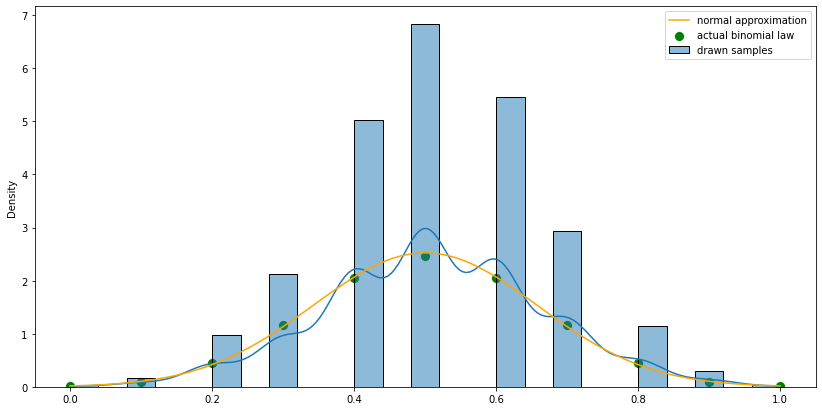

In [11]:
fig,ax = plt.subplots(figsize=(14,7))

sns.histplot(sample_means, stat='density', kde=True, ax=ax, label='drawn samples',)

x = np.linspace(0,1,100)
sns.lineplot(x=x, y=approximation_normal.pdf(x),
             ax=ax, color="orange", label='normal approximation')
sns.scatterplot(x=np.arange(11)/10, 
                y=theoretical_binomial.pmf(np.arange(11))*10 , 
                s=100, color='green', ax=ax, label='actual binomial law')

In [ ]:
# %load solutions/solution_02_01.py


<br>

So, the property of the mean of samples let's us predict : 
* the probability that a given sample mean will fall within a certain distance of the real mean.
* the probability that the real mean will fall within a certain distance of a sample mean.

Both can be defined using the size of the interval, centered on the mean, that contains 95% of the probability density. 
To capture 95% of the density we use the quantiles 0.025 and 0.975 of the PDF. These quantiles are computed using `.ppf` (percent-point function).

9536 out of 10000 sampled means fall within the 95% confidence interval [0.91234775 1.08765225]


<AxesSubplot:ylabel='Count'>

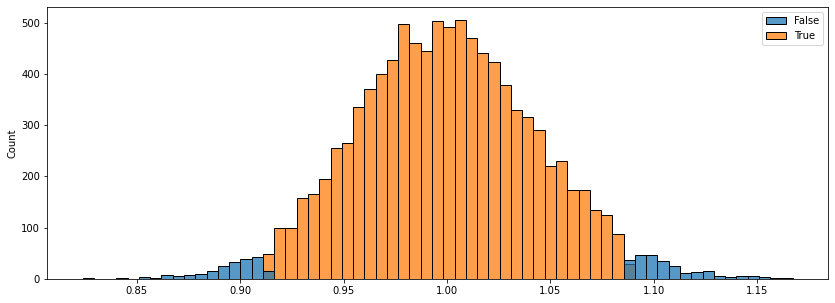

In [12]:
meanOriginal = 1 # the mean of this exponential law is 1
stdevOriginal= 1 # its standard deviation is 1

sampleSize = 500
mu = meanOriginal
stdev = stdevOriginal / np.sqrt(sampleSize)


# interval computed from the normal law. 
# 95% of sampled means should fall within that interval. Let's test this
CI = stats.norm.ppf([0.025,0.975] , loc = mu , scale = stdev )

sampled = np.array( [ sampling(sampleSize).mean() for i in range(10000) ] )

nbInside = sum( ( sampled<CI[1] ) * ( sampled>CI[0] ) )
print(nbInside , 'out of', 10000 , 'sampled means fall within the 95% confidence interval' , CI)

fig=plt.figure(figsize=(14,5))
sns.histplot(x=sampled , hue = [ ( x<CI[1] ) and ( x>CI[0] )  for x in sampled ] )

In [13]:
# Now, let's see how many times the real mean falls within the confidence interval centered on the sample mean.
nbInside =0
for i in range(10000):
    sampledMean = sampling(sampleSize).mean()
    CI = stats.norm.ppf([0.025,0.975] , loc = sampledMean , scale = stdev )
    
    if meanOriginal<CI[1] and meanOriginal>CI[0]:
        nbInside+=1

print(nbInside , 'out of', 10000 , 
      'times, the real mean falls within the 95% confidence interval of the sampled mean.' )

9500 out of 10000 times, the real mean falls within the 95% confidence interval of the sampled mean.


So, here, we were able to generate a confidence interval around the sampled mean such that 95% of the time
such an interval contains the real mean: this is the confidence level.


**overview of functions to manipulate the theoretical distributions**

* **.pdf / pmf** : takes a value and return the density / probability of drawing this particular value
* **.cdf** : takes a value and return the probability of drawing this value or less
* **.ppf** : takes a quantile and returns the corresponding value (inverse of cmf)



[back to the toc](#toc)

<br>

# Exercise 02  <a id='2'></a>


Say you toss 10 coins, and obtain heads 7 times.

This experiemt is equivalent to a binomial law with n=10 and p=0.5. `stats.binom(n=10,p=0.5)`
Using `.pmf()` , `.cdf()`, and/or `.ppf()`, answer the following questions :

1. How likely was this result, provided the coin is fair? 
2. How likely was it to come up with at most 7 heads , provided the coin is fair? 
3. How likely was it to come up with at least 7 heads , provided the coin is fair? 
4. How likely was it to come up with a result at least as different from the expected mean of 5, provided the coin is fair? 
5. How about if you come up with 1 heads out of 10 ? Do you think the coin is fair in that case? 



In [32]:
experiment_distrib = stats.binom(n=10,p=0.5)

# 1
print(
    "the probability to obtain 7 heads is",
    experiment_distrib.pmf(7),
    end=' '
)

the probability to obtain 7 heads is 0.11718750000000014 

In [41]:
for i in range(10):
    print('probability of getting', i, 'head(s):', experiment_distrib.pmf(i))

probability of getting 0 head(s): 0.0009765625
probability of getting 1 head(s): 0.00976562500000001
probability of getting 2 head(s): 0.04394531249999999
probability of getting 3 head(s): 0.11718750000000014
probability of getting 4 head(s): 0.20507812500000022
probability of getting 5 head(s): 0.24609375000000025
probability of getting 6 head(s): 0.20507812500000022
probability of getting 7 head(s): 0.11718750000000014
probability of getting 8 head(s): 0.04394531249999999
probability of getting 9 head(s): 0.00976562500000001


In [33]:
# 2 | 7 heads at most, say differently, 7 heads or less
experiment_distrib.cdf(7)

0.9453125

In [35]:
# 3 | at least 7 heads
1 - experiment_distrib.cdf(6)

0.171875

In [43]:
experiment_distrib.sf(6)

0.17187499999999994

In [37]:
# 5
experiment_distrib.pmf(1) # proba to get 1 head

0.00976562500000001

In [38]:
# the mean is 5 and the distance between 5 and 7 (7 is what we mesured) is 2
# results at least as extreme as 7 are : 0,1,2,3 and 7,8,9,10
print('probability of obtaining a result as extreme as 7 heads:',
      experiment_distrib.cdf(3) + ( 1- experiment_distrib.cdf(6)) )

probability of obtaining a result as extreme as 7 heads: 0.34374999999999994


The probability to obtain only 1 head out of 10 is rare but likely

In [44]:
# results at least as extreme as 1 are : 0,1 and 9,10
print('probability of obtaining a result as extreme as 1 heads:',
      experiment_distrib.cdf(1) + ( 1- experiment_distrib.cdf(8)) )

probability of obtaining a result as extreme as 1 heads: 0.021484375


In [62]:
# %load solutions/solution_02_02.py



[back to the toc](#toc)

<br>

# 2. Statistical hypothesis testing  <a id='3'></a>

Recipe for a statistical hypothesis test :

1. Define a **null hypothesis** and an **alternative hypothesis**. These hypotheses are statements about the “real world”
2. Define a **test statistic** (e.g. the mean of a sample) and its expected behaviour under the null hypothesis.
3. Collect data and calculate the **observed value of the test statistic**.
4. Compare the observed test statistic to its expected values under the null hypothesis


A **test statistic** is a numerical summary derived from a sample, which must be calculable (exactly or approximately) from its sampling distribution under the null hypothesis.



### example 

Say we sample $n$ measures from a normal law of unknown mean $m$ and known variance $\sigma$, which we note $N(m,\sigma)$.

* null hypothesis : $H_0 = m = m_0$ (for instance $m_0$ can be a reference value coming from another population)
* alternative hypothesis : $H_1 = m \neq m_0$
* According to the CLT (see above) the mean of a sample of $n$ measures here should follow a normal distribution : $\bar{x} \sim N(m , \sigma / \sqrt{n} )$. 
* **Under the null hypothesis** : $\bar{x} \sim N(m_0 , \sigma / \sqrt{n} )$

In practice it is more practical to **center and scale** this distribution:

$$\bar{x} \sim N(m_0 , \sigma / \sqrt{n} ) \rightarrow \frac{\bar{x} - m_0}{\sigma / \sqrt{n}} \sim N( 0 , 1 )$$

* **test statistic** : $$\frac{\bar{x} - m_0}{\sigma / \sqrt{n}}$$




Let's have $m_0 = 1$, $\sigma = 2$, and say we collected $n=100$ measures and their mean is $\bar{x}=1.42$.

Thus the test statistic is $\frac{\bar{x} - m_0}{\sigma / \sqrt{n}} = 2.1$

What is the probability of obtaining a test statistic at least as extreme as the observed one under the null hypothesis ?

C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


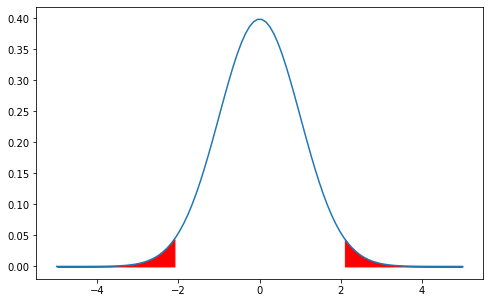

In [14]:
x= np.linspace(-5,5,100)
fig,ax=plt.subplots(figsize=(8,5))
sns.lineplot(x , stats.norm.pdf(x) )
x1= np.linspace(-5,-2.1,100)
plt.fill_between(x1, stats.norm.pdf(x1) , color='red')
x2= np.linspace(2.1,5,100)
plt.fill_between(x2, stats.norm.pdf(x2) , color='red')

In [15]:
testStatistic = 2.1
probaMoreExtreme = ( stats.norm.cdf(- abs(testStatistic) )  +   # probability of observing <= -2.1
                   ( 1-stats.norm.cdf( abs(testStatistic) ) ) ) # probability of observing >=  2.1
print(probaMoreExtreme)

0.035728841125633105


This is the definition of the **p-value** : the probability of obtaining a test statistic at least as extreme as the observed one under the null hypothesis.





### two-sided or one-sided test?

Above, you can see that when we get the p-value we account for test-statistics at least as extreme both in the negative and in the positive.

This is what we call a **two-sided** hypothesis test, where $H_1 = m \neq m_0$ includes the possibility that $m>m_0$ as well as $m<m_0$.

It is possible to perform a **one-sided** hypothesis test, where for example, $H_1 = m > m_0$, in which case the p-value would account for the sign of the test statistic:

one-sided p-value : 0.017864420562816563
C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


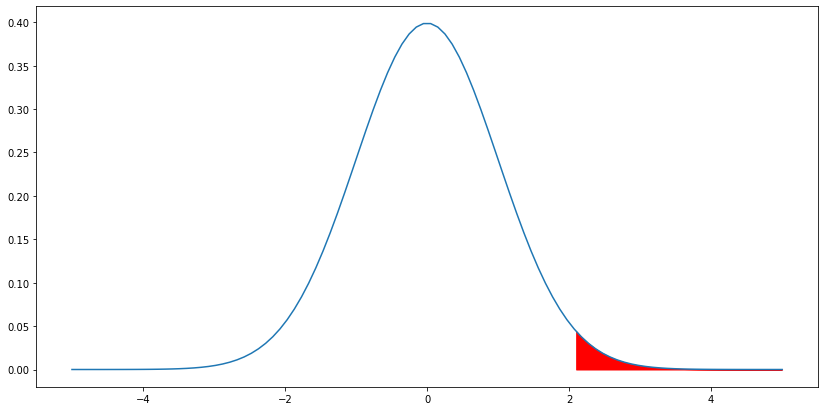

In [16]:
testStatistic = 2.1
probaMoreExtreme = ( 1-stats.norm.cdf( abs(testStatistic) ) )  # probability of observing >= 2.1
print("one-sided p-value :",probaMoreExtreme)

x= np.linspace(-5,5,100)
fig,ax=plt.subplots(figsize=(14,7))
sns.lineplot(x , stats.norm.pdf(x) )
x2= np.linspace(testStatistic,5,100)
plt.fill_between(x2, stats.norm.pdf(x2) , color='red')

> Note that the distribution of the test statistic is symetric, so the 2-sided p-value is twice that of the 1-sided p-value (if it is <0.5).


[back to the toc](#toc)

<br>

## 2.1 t-test : difference between two means  <a id='4'></a>

The example test we have just shown requires the population standard deviation to be known in advance, which is, in practice, often not the case.
In that case one can estimate the variance using the sample, but then the test statistic does not follow a normal distribution but rather a **t-distribution with $n-1$ degrees of freedom.**


C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

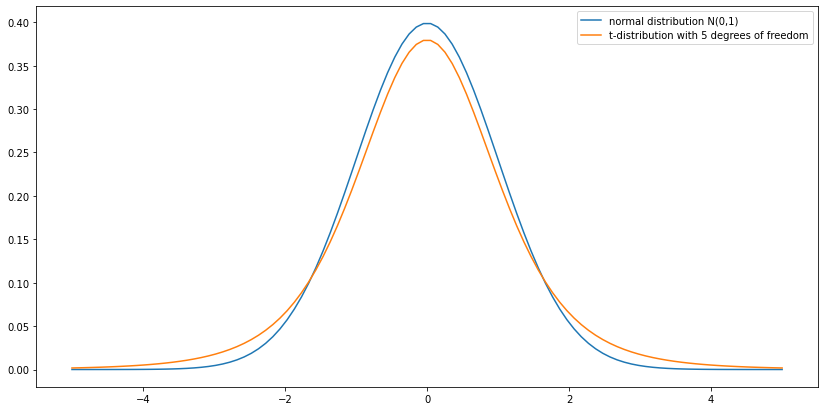

In [17]:
x= np.linspace(-5,5,100)
fig,ax=plt.subplots(figsize=(14,7))
sns.lineplot(x , stats.norm.pdf(x) , label='normal distribution N(0,1)')
sns.lineplot(x , stats.t.pdf(x,df=5) , label='t-distribution with 5 degrees of freedom')

C:\Users\WIECKOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\WIECKOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

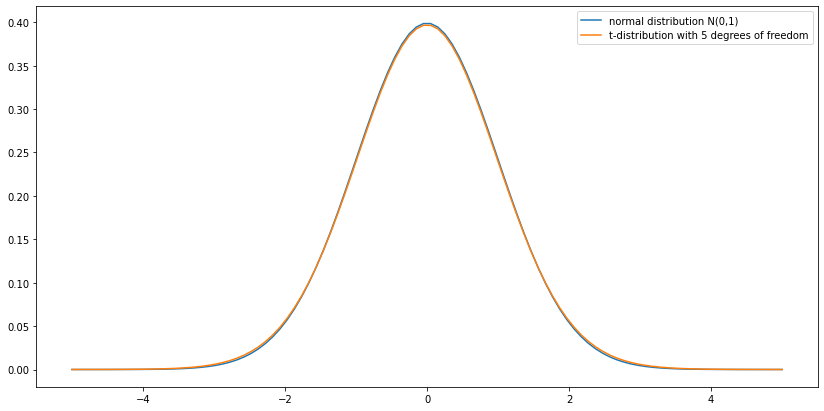

In [54]:
x= np.linspace(-5,5,100)
fig,ax=plt.subplots(figsize=(14,7))
sns.lineplot(x , stats.norm.pdf(x) , label='normal distribution N(0,1)')
sns.lineplot(x , stats.t.pdf(x,df=50) , label='t-distribution with 5 degrees of freedom')

This t-distribution can also be used to test the (in)equality of the mean of two unpaired samples.

Consider two populations, of respective means $\mu_1$ and $\mu_2$, from which we sample $n_1$ and $n_2$ individuals and observe the sample means $\bar{x}_1$ and $\bar{x}_2$ and standard deviations $s_1$ and $s_2$.

The null hypothesis for this t-test is $H_0 = \mu_1 = \mu_2$, while the alternative hypothesis is $H_1 = \mu_1 \neq \mu_2$.

There is a number of assumptions around that test:
 * the mean of each sample are normally distributed. When the sample size is large enough, the CLT ensures that part
 * the data used to carry out the test should be sampled independently from the two populations being compared

The t-test of independance, also called Welch's t-test:

- our test statistic: 
$$\frac{\bar{x}_1-\bar{x}_2}{\sqrt{(s_1^2/n_1+s_2^2/n_2)}}$$

- with the variances calculated as:
$$s_1^2 = \frac{\sum_{i=1}^{n_1}(x_i-\bar{x_1})^2}{n_1-1}$$
$$s_2^2 = \frac{\sum_{j=1}^{n_2}(x_j-\bar{x_2})^2}{n_2-1}$$

And the test statistic under the null hypothesis shall follow a t-distribution with degrees of freedom equal to :

$$df = \frac{[\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}]^2}{\frac{(\frac{s_1^2}{n_1})^2}{n_1-1} + \frac{(\frac{s_2^2}{n_2})^2}{n_2-1}}$$

> note : if the two samples variance are equal there is another way of computing the degree of freedom that gives a bit more statistical power. But this requires that you test for variance equality first.


Let's try this with an example:

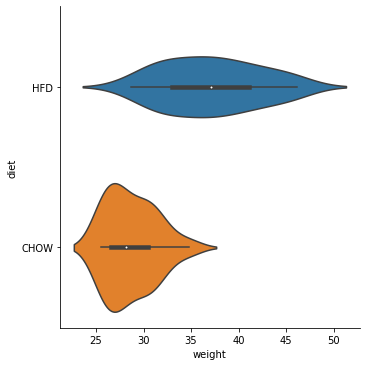

In [18]:
mice_data = pd.read_csv( 'data/mice_data.csv' ) # data about the weight of mices of different genotypes and subjected to different diets
sns.catplot(x='weight' , y='diet' , data=mice_data , kind='violin')

In [56]:
mice_data.head()

,diet,genotype,weight
0,HFD,WT,31.2
1,HFD,WT,32.1
2,HFD,WT,30.3
3,HFD,WT,45.0
4,HFD,WT,39.2


In [19]:
CHOWdata = mice_data['weight'][mice_data['diet'] == 'CHOW']
HFDdata = mice_data['weight'][ mice_data['diet'] == 'HFD' ]

n1 = len(CHOWdata)
n2 = len(HFDdata)

CHOWmean = np.mean(CHOWdata)
HFDmean = np.mean(HFDdata)

CHOWsigmaSq = np.var(CHOWdata, ddof=1) # ddof, for delta degree-of-freedom handles the n-1 dividor
HFDsigmaSq = np.var(HFDdata, ddof=1)

tstat = (CHOWmean - HFDmean) / (np.sqrt((CHOWsigmaSq/n1) + (HFDsigmaSq/n2)))

print('test statistic : ',tstat , sep='\t')

df = (( CHOWsigmaSq / n1 + HFDsigmaSq/n2 )**2) / (((CHOWsigmaSq/n1)**2/(n1-1)) + (( HFDsigmaSq /n2)**2/(n2-1)) )
print('degree of freedom : ',df , sep='\t')
pval = stats.t.cdf(-abs(tstat),df=df) + (1-stats.t.cdf(abs(tstat),df=df))
print('p-value : ',pval , sep='\t\t')

test statistic : 	-7.738758252909616
degree of freedom : 	44.254639192414686
p-value : 		9.244178357624686e-10


In this case, there exists a function in the `stats` module:

In [60]:
tstat, pval = stats.ttest_ind( CHOWdata , HFDdata , equal_var=False) #use equal_var=True if you have tested for variance equality
print('test statistic : ',tstat , sep='\t')
print('p-value : ',pval , sep='\t\t')

test statistic : 	-7.738758252909616
p-value : 		9.244177959442075e-10


We get the same results.

**micro-exercise**
1. Given these results, what is our conclusion there ?
2. if the p-value was 0.3, what would be our conclusion ?


Very unlikely to observe the difference observed if H0 was true -> rejection H0.


[back to the toc](#toc)

<br>

## 2.2 t-test assumptions and what to do when they are not respected  <a id='5'></a>

As you have seen, a p-value is valid with respect to a particular null-hypothesis that relies on a number of assumptions regarding the data behavior.

If these assumptions are false, then the p-value loses its meaning.

Let's get back to the assumptions of Welch's t-test:
 1. the data used to carry out the test should be sampled independently from the two populations being compared
 
 2. the mean of each sample are normally distributed. When the sample size is large enough, the CLT ensures that part

Point `1.` should be taken care of when designing the experiment and collecting the data. Note that there also exists a t-test when all points are paired (e.g. when you have data for the effect of 2 drugs for each patients). 

For point `2.`, ideally the samples themselves should follow a normal distribution (this is the original requirement of Student's t-test). Otherwise you should make sure the sample size is large enough for the sample mean to follow something resembling a normal law.

Note that there exists no set sample size above which you are in the clear : it is dependent on the particulars of the distribution(s) you sample from.

Let's demonstrate how things can go wrong.
Take two samples from the same distribution and perform a t-test on them ; if the t-test is appropriate then 
we should see a p-value < 0.05 in about 5% of the cases.

In [20]:
n1 = n2 = 5

#experimental setup : we sample twice from the same distribution normal distribution
mu, sigma = 5, 3
nbUnder05 = 0
for i in range(10000):
    sample1 = np.random.normal( mu, sigma , size = n1 )
    sample2 = np.random.normal( mu, sigma , size = n2 )
    tstat,pval = stats.ttest_ind(sample1,sample2 , equal_var=True)
    if pval < 0.05:
        nbUnder05 += 1
print('normal law','proportion of sampled p-values under 0.05',nbUnder05/10000,sep='\t')

#second setup : rather than sampling in a normal law, we will sample here in a binomial law 
n, p = 5, 0.01
nbUnder05 = 0
for i in range(10000):
    sample1 = np.random.binomial( n=n, p=p , size = n1 )
    sample2 = np.random.binomial( n=n, p=p , size = n2 )
    tstat,pval = stats.ttest_ind(sample1,sample2 , equal_var=True)
    if pval < 0.05:
        nbUnder05 += 1
print('binomial law','proportion of sampled p-values under 0.05',nbUnder05/10000,sep='\t')

normal law	proportion of sampled p-values under 0.05	0.0469
binomial law	proportion of sampled p-values under 0.05	0.0011


As you can see, the p-value is only as good as long as the assumptions of the null hypothesis hold.

> Simulating the behavior of data under the null hypothesis is an excellent way to explore how these tests work.



The simplest way to check that the assumption of normality for the mean of the sample is to check the normality of the data itself


[back to the toc](#toc)

<br>

### 2.2.1 testing normality  <a id='6'></a>

There exists several methods to test for normality and we recommend to combine a graphical method 
with a classic statistical test in order to get the best view of one's data.

You can get a graphical overview of the goodness-of-fit of a sample with a Quantile-Quantile-plot, or **QQplot**. 
The idea here is to compute a number of quantiles on your sample's values and plot them with the expected quantiles for the normal law.
**Samples drawn from a normal law will form a diagonal line.**


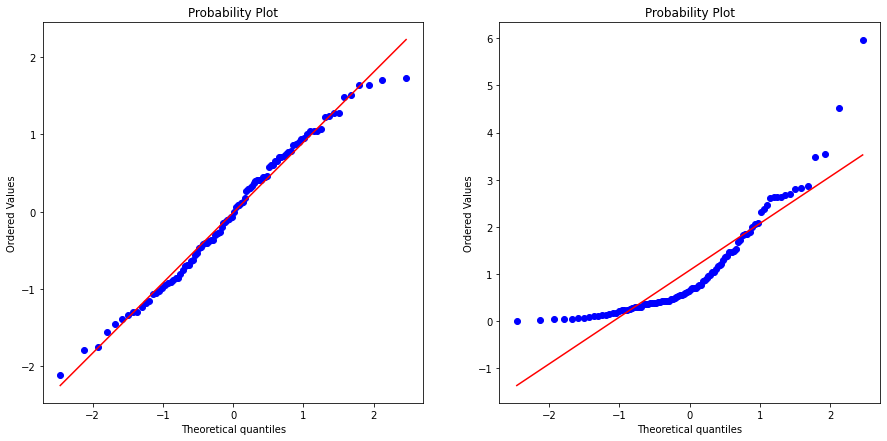

In [21]:
sampleN = np.random.normal(size = 100) #sample from a normal law
sampleE = np.random.exponential(size = 100) # sampling from another distribution

fig,axes = plt.subplots(1,2 , figsize = (15,7) )
junk = stats.probplot( sampleN , plot=axes[0] )
junk = stats.probplot( sampleE , plot=axes[1] )
# note : 
# * stats.probplot plots against the normal law by default, but that can be changed
# * the function returns theoretical and observed quantile, which are not interesting to us here.

Regarding the statistical test, we propose the **Shapiro-Wilk** test. 
It has been shown to have a slighly better power than other tests by a [2011 study](https://web.archive.org/web/20150630110326/http://instatmy.org.my/downloads/e-jurnal%202/3.pdf).

This test relies on the comparison between each sorted point in the observed distribution and its expected value in a normal distribution. 
Originally proposed for no more than 50 points, refinements to the algorithm now makes this test reliable up to 5000 points (as mentionned in `help(scipy.stats.shapiro)`) ; above this number another test, such as D'agostino's  (`scipy.stats.normaltest`), should be used instead.

This test's **null hypothesis is normality**, so a small p-value corresponds to a rejection of normality.

In [22]:
tstat,pval = stats.shapiro(sampleN)
print('normal data     ',"Shapiro-Wilk's normality test p-value",pval , sep='\t')
tstat,pval = stats.shapiro(sampleE)
print('exponential data',"Shapiro-Wilk's normality test p-value",pval, sep='\t')

normal data     	Shapiro-Wilk's normality test p-value	0.29886606335639954
exponential data	Shapiro-Wilk's normality test p-value	1.2666585558207544e-09


Reject the normality hypothesis for the exponential distribution

**micro-exercise**

Check the normality for the weights of mices subjected to the CHOW and HFD diets.

In [73]:
CHOWdata = mice_data['weight'][ mice_data['diet'] == 'CHOW' ]
HFDdata = mice_data['weight'][ mice_data['diet'] == 'HFD' ]


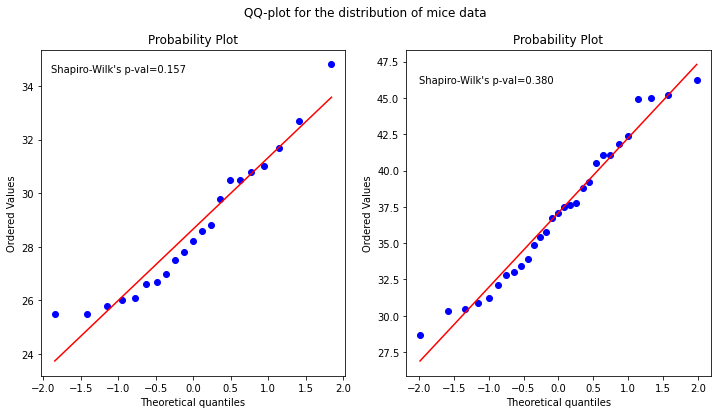

In [23]:
# QQ-plot with the coresponding Shapiro-Wilk's normality test p-value
fig, axes = plt.subplots(1,2 , figsize = (12,6) )
stats.probplot(CHOWdata,plot=axes[0])
stats.probplot(HFDdata, plot=axes[1])
axes[0].text(-1.9, 34.5, f"Shapiro-Wilk's p-val={stats.shapiro(CHOWdata)[1]:.3f}")
axes[1].text(-2, 46, f"Shapiro-Wilk's p-val={stats.shapiro(HFDdata)[1]:.3f}")
plt.suptitle('QQ-plot for the distribution of mice data');

# we can't reject the H0 hypothesis of normality for both data sets

When the data itself is not normal,
a good knowledge of the measure you are taking and a large enough sample size may allow you to presume that the mean of the samples are normally distributed.

However in the general case it is then better to avoid using the t-test and prefer another type of test that do not make the assumption of normality of the mean : **nonparametric tests**.


[back to the toc](#toc)

<br>

### 2.2.2 nonparametric testing : Mann–Whitney U test  <a id='7'></a>

**Nonparametric statistics** is the branch of statistic that does not rely on the known families of distributions (normal, binomial, exponential, ...) that requires specified parameters (mean and variance, $n$ and $p$ , $\lambda$ , ... ). 
Thus, nonparametric statistics is particularly useful when assumptions of normality do not hold.

The **Mann–Whitney U test** is a nonparametric test 
to determine if two samples have different locations


**Assumptions**
 * All observations from samples are independent of each other
 * The values in each samples are ordinal (i.e.,thay can be compared)

**H0** : the probability that a randomly selected value from the first sample is lower than a randomly selected value from the second sample is equal to the probability of being greater.

**Test statistic** : $U$, which is computed by looking at each observation $i_1$ in the first sample and counting $1$ for each observation lower than $i_1$ in the second sample (count 0.5 for ties).

Scipy proposes the function `scipy.stats.mannwhitneyu`, but the p-value is only valid when the number of observations in both samples is above 20, as then the distribution of $U$ under the null hypothesis can be approximated using a normal distribution.


**Example**

Say you have two samples:
* sample1 : 1.2 1.5 2.2 3.0 3.1 
* sample2 : 1.1 1.8 2.2 2.4 2.8 

for each observation in sample1, let's count the number of values lower to it in sample2 :


In [24]:
sample1= [ 1.2 , 1.5 , 2.2 , 3.0 , 3.1 ]
sample2= [ 1.1 , 1.8 , 2.2 , 2.4 , 2.8 ]
def computeU(sampleA , sampleB):
    U1=0
    U2=0
    for i in sampleA:
        for j in sampleB:
            if j<i:
                U1 += 1
            elif i==j:
                U1 += 0.5
                U2 += 0.5
            else:
                U2 += 1
    return min(U1,U2)
U_manual = computeU(sample1 , sample2)

U1_scipy , pval = stats.mannwhitneyu(sample1,sample2,alternative='two-sided') # here the p-val is not valid
U2_scipy , pval = stats.mannwhitneyu(sample2,sample1,alternative='two-sided') # here the p-val is not valid
U_scipy = min(U1_scipy , U2_scipy) 
# scipy implements a computation of U that only accounts for cases where sample1 is above sample2 ...

print('U manual :',U_manual)
print('U scipy  :',U_scipy)

U manual : 10.5
U scipy  : 10.5


In [94]:
pval   # not correct for n<20

0.7532980334628382

When the normal approximation of the test statistic cannot be applied, we can rely on old-fashioned tables such as [this one from uMBoston](http://ocw.umb.edu/psychology/psych-270/other-materials/RelativeResourceManager.pdf).
> To use this table, look up the number in the cell corresponding to the size of both samples and the desired confidence level. If U is under this number then the test is significant and H0 is rejected.

Here, $n1=n2=5$, for a confidence level of $0.05$ then the test is significant only when $U<2$.


Note that **the null hypothesis of the Mann-Whitney U test is different from the one of the t-test**.
The t-test looks for equality of the means, while the U tests for equiprobabilities of seing lower/higher values.

This means that they will sometimes behave quite differently (See for instance [Fagerland2012](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/1471-2288-12-78), which shows that Mann-Whitney U rejects $H_0$ with a high frequency when two samples only differ in variance and not in mean or median).

It is important to keep this in mind when interpretating results.



**micro-exercise**

Perform the Mann-Withney U test on the mice data. 
What is your conclusion?

> here, there is more than 20 observation in both samples, so you can rely on the p-value returned by `scipy.stats.mannwhitneyu`

In [100]:
stats.mannwhitneyu(CHOWdata,HFDdata, alternative='two-sided')

MannwhitneyuResult(statistic=35.0, pvalue=1.234940699651907e-07)

In [101]:
stats.mannwhitneyu(HFDdata,CHOWdata, alternative='two-sided')

MannwhitneyuResult(statistic=574.0, pvalue=1.234940699651907e-07)

Reject H0


[back to the toc](#toc)

<br>

## 2.3 p-value, power and errors  <a id='8'></a>

Now that you have seen a couple of statistical tests, 
let's explore in more details how to evaluate a test results and the uncertainties around it.


[back to the toc](#toc)

<br>

### 2.3.1 errors of type I and II  <a id='9'></a>

* **type I  error** : rejecting $H_0$ while it is True  (e.g., detecting an illness in an uninfected patient)
* **type II error** : accepting $H_0$ while it is False (e.g., not detecting an illness in an infected patient)

![Type_I_and_II_error](images/Type_I_and_II_error.jpg)
Image source: unbiasedresearch.blogspot.com

![inferiential_table](images/error_type_table.png) 


The probability of committing type I error, commonly noted $\alpha$, is usually controled and set to 0.05, or 0.01.

The probability of committing type II error, commonly noted $\beta$, is more complex to control and can only be set for specific effect sizes. In practice we rather refer to $1-\beta$, called the **power** of the test.




[back to the toc](#toc)

<br>

### 2.3.2 P-values  <a id='10'></a>

* The **p-value** is the probability of obtaining a test statistic **as or more extreme** as the observed one, **if the null hypothesis is true**
* In other words, how likely would it be to observe such a large test statistic "by chance", if there is no true underlying signal?
* A given p-value is **always** linked to a specific null hypothesis. 

There are many misconceptions about p-values (see e.g. [Goodman (2008)](http://www.sciencedirect.com/science/article/pii/S0037196308000620))
* A p-value is **not** the probability that the null hypothesis is correct
* A p-value is **not** the probability that we are making an error
* A large p-value does **not** prove that there is no true signal
* Always report the exact p-value - given today's computers there is no reason to just say $p<0.05$

In the presence of a true effect, p-values are affected by the sample size, since our estimates are getting more precise with larger sample sizes


**Example :** two samples of $n$ observations each, mean difference = 0 or 1. Let's look at the t-tests p-values

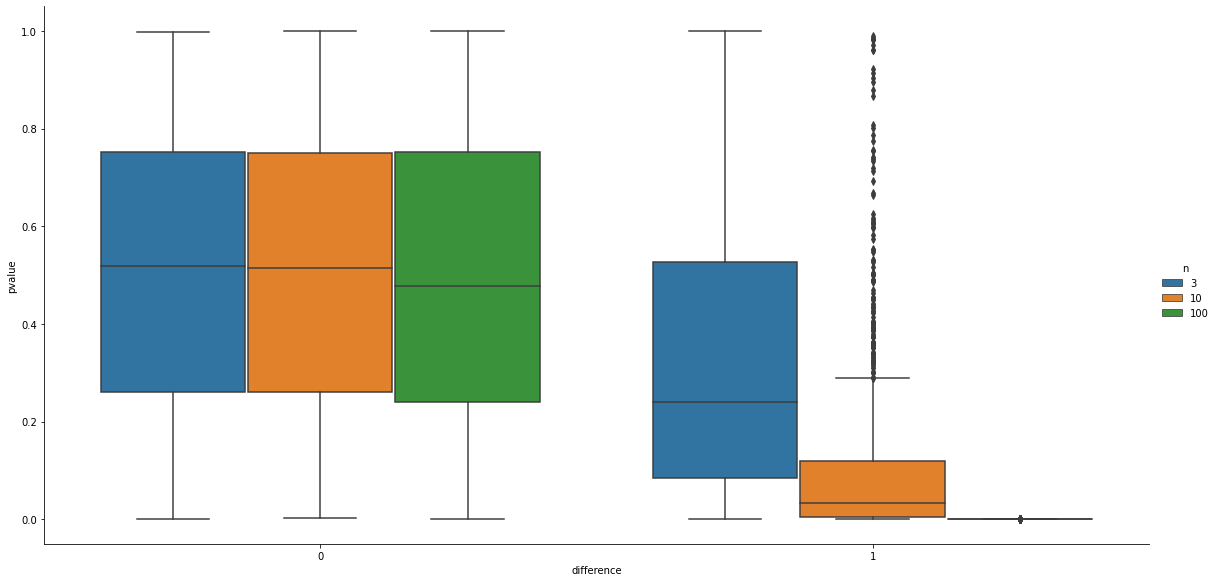

In [30]:
def testTtest( n=100 , d=0 , std = 1): 
    # draws 2 samples with a set difference in mean and return the t statistic and p-value of a t-test
    t , pval_ttest = stats.ttest_ind( np.random.randn( n ) * std , np.random.randn( n ) * std + d ,equal_var=True)
    return t,pval_ttest
    

D , N , PVAL = [],[] , []
for d in [0,1]:
    for n in [3,10,100]: # 3 sizes of samples
        for x in range(1000): # repeat a 1000 time to get an idea of variation
            tstat, pval = testTtest(n=n , d=d)
            PVAL.append( pval )
            N.append(n)
            D.append(d)

# we push to a dataframe for easy plotting
df= pd.DataFrame( { 'n':N , 'pvalue': PVAL , 'difference' : D} )
sns.catplot( x='difference' , y='pvalue' , hue='n', data=df  , kind='box' , height=8 , aspect=2)


[back to the toc](#toc)

<br>

### 2.3.3 power  <a id='11'></a>

The power of any statistical test is the **probability of rejecting a false negative hypothesis**. 
It is defined as $1−\beta$ where $\beta$ is the probability of type II error.

Power depends on :
* a specific null hypothesis
* a specific experimental setup (sample sizes)
* a specific state of reality (e.g., the real difference between population means)

In practice the "specific state of reality" often corresponds to a given **effect size**. 
When comparing means - as in the t-test - the effect size correspond to the (absolute) difference between the two means divided by the standard deviation.

**Example** : 
We use a t-test to detect eventual difference in mean between two populations using two samples of size 20.

If the difference between populations is $2$, and they have the same standard deviation of $3$,
what is the probability that we will detect a difference at a significance level of 0.05 (i.e., that we will reject $H_0$ when the p-value<0.05) ?




test theshold: 2.024394164575136
Fraction of rejected (~power): 0.5408


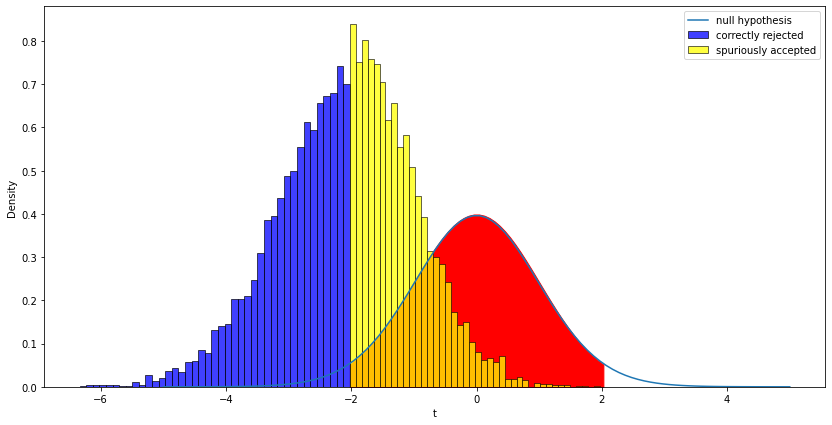

In [31]:
mean_difference = 2
standard_dev = 3
sample_size = 20
sig_level = 0.05

## simulation 
N=10000
nbRejected = 0
tstats = []
rejected=[]
for i in range(N):
    # I use the testTtest function previously defined to simulate the test
    t,pval = testTtest( n=sample_size , d=mean_difference , std=standard_dev ) 
    tstats.append(t)
    rejected.append( pval<sig_level )

df= pd.DataFrame( {  'rejected': rejected , 't' : tstats} )


# For this test, the level of significance is
threshold = stats.t.ppf( 1-sig_level/2  , df = 2*sample_size - 2 )

## plotting our results
x= np.linspace(-5,5,100)
fig,ax=plt.subplots(figsize=(14,7))
sns.lineplot(x=x , y=stats.t.pdf(x , df = 2*sample_size - 2 )  , label = 'null hypothesis')
xAccepted = np.linspace(-threshold , threshold , 50 )
plt.fill_between(xAccepted, stats.norm.pdf(xAccepted) , color='red')

sns.histplot( x=df.loc[ df.rejected==True ,'t']  , color='blue',
             stat='density' , label = 'correctly rejected')
sns.histplot( x=df.loc[ df.rejected==False ,'t'] , color='yellow',
             stat='density' , label = 'spuriously accepted')

plt.legend()

print('test theshold:',threshold)
print('Fraction of rejected (~power):', sum(df.rejected)/N )

In practice we often have to rely on simulation procedures (as shown above) to estimate statistical power. 
However for some classical statistical tests like the t-test there exists libraries to compute statistical power: 

In [32]:
from statsmodels.stats.power import TTestIndPower
effect_size = mean_difference/standard_dev

P = TTestIndPower()
print( 'power:' , P.power(effect_size=effect_size , nobs1=sample_size , ratio=1 , alpha=0.05))
# fraction of rejected

power: 0.5377868448973436


> note the argument `ratio` , which is the number of observations in sample 2 relative to
        sample 1. in other words : `ratio = n2/n1`

**Calculating statistical power can help inform our experimental design**. 

For example, how many observation per sample do we need if we want to detect a difference in mean of 1 with significance level (type I error) 0.01 and statistical power 0.80:

minimum sample size: 25.066708773444205


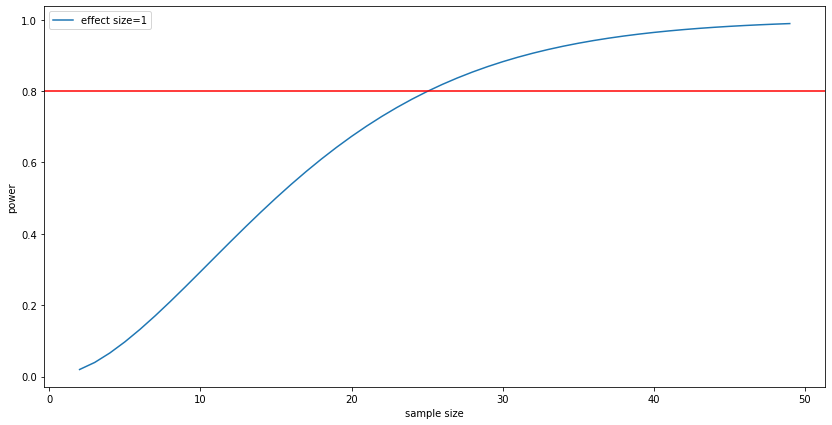

In [33]:
effect_size=1
sig_threshold = 0.01
P = TTestIndPower()

powers = []
for sample_size in range(2,50):
    powers.append( P.power(effect_size=effect_size , nobs1=sample_size , ratio=1 , alpha=sig_threshold) )

fig,ax=plt.subplots(figsize=(14,7))
sns.lineplot(x=range(2,50) , y=powers , label = 'effect size='+str(effect_size) , ax=ax)
ax.axhline(0.8, color='r', linestyle='-')
ax.set(xlabel='sample size', ylabel='power')


## or, directly:
print( 'minimum sample size:', P.solve_power(effect_size=effect_size , nobs1=None ,  ratio=1 , alpha=sig_threshold , power = 0.8))


[back to the toc](#toc)

<br>

# Exercise 03  <a id='12'></a>

Consider the mice data loaded in the `mice_data` DataFrame above.

1. Compute the effect size of the diet on the weights 
2. Compute the statistical power of the corresponding t-test for that effect size 

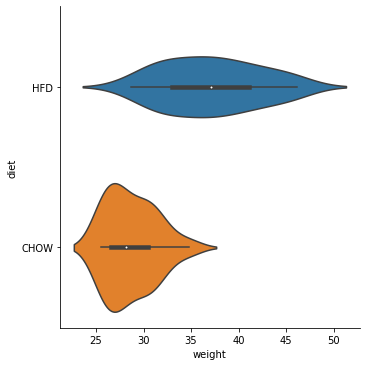

In [25]:
mice_data = pd.read_csv( 'data/mice_data.csv' ) # data about the weight of mices of different genotypes and subjected to different diets
sns.catplot(x='weight' , y='diet' , data=mice_data , kind='violin')

CHOWdata = mice_data['weight'][ mice_data['diet'] == 'CHOW' ]
HFDdata = mice_data['weight'][ mice_data['diet'] == 'HFD' ]

In [34]:
# %load solutions/solution_02_03.py
# 1. Compute the effect size of the diet on the weights 

n1 = len(CHOWdata)
n2 = len(HFDdata)

CHOWmean = CHOWdata.mean()
HFDmean = HFDdata.mean()

# now, what to do when we have not one, but two standard deviation...
# the correct answer is to pool the variance : https://en.wikipedia.org/wiki/Pooled_variance
CHOWsigmaSq = CHOWdata.std()
HFDsigmaSq = HFDdata.std()

pooled_variance = ( ( CHOWsigmaSq*(n1-1) ) + (HFDsigmaSq * (n2-1) ) )/(n1-1+n2-1)

# OK that one was a bit of a trick. You already get credit if you had the idea that something has to be done.

#from there, the effect size can be computed as before:
effect_size = ( CHOWmean - HFDmean )/ ( pooled_variance )**0.5
print("the effect size of diet on mice weight is",effect_size)
                                              

# 2. Compute the statistical power of the corresponding t-test for that effect size
print( 'power:' , P.power(effect_size=effect_size , nobs1=n1 , ratio=n2/n1 , alpha=0.05) )

the effect size of diet on mice weight is -4.213816806017733
power: 1.0



[back to the toc](#toc)

<br>

## 2.4 BONUS : multiple testing   <a id='13'></a>


## Multiple hypothesis testing

Recall the definition of the p-value: the probability of obtaining a test statistic at least as extreme as the one observed, **if the null hypothesis is true**

Thus, *even* if the p-value is, let's say, 0.04, there is still a 4% chance of obtaining such an extreme result by chance.

This is often acceptable if we only perform one test, if we perform many tests we have seen (with the simulations), that even when there is no real effect some tests will turn out significant by chance.

> This is the definition of the $\alpha$ risk fo type I error is.

Of course, this has important implication for science and the relevance of our results.

![xkcd882.png](images/xkcd882.png)

> source : [xkcd](http://xkcd.com) (note: there many relevant xkcd strips for this course)

[Text(0.5, 0, 'number of tests'),
 Text(0, 0.5, 'probability of at least 1 test significant by chance')]

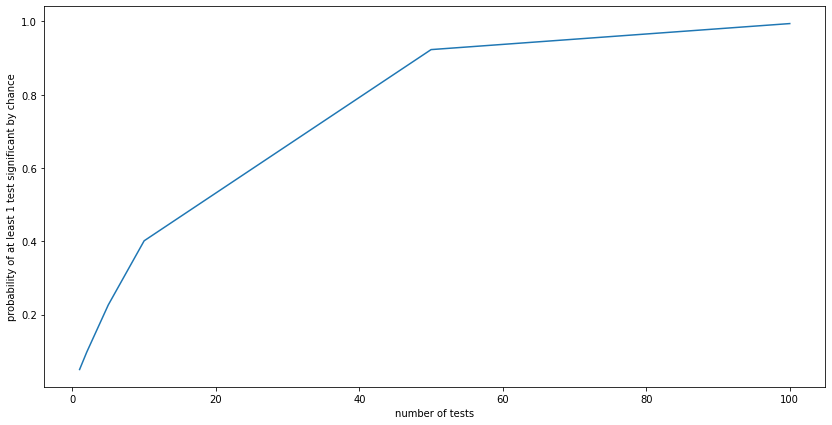

In [35]:
P = np.array([1, 2, 5, 10, 50, 100])
fig,ax=plt.subplots(figsize=(14,7))
sns.lineplot( x=P , y=1- 0.95**P ,ax=ax)
ax.set(xlabel='number of tests', ylabel='probability of at least 1 test significant by chance')



We need to change perspective.
Instead of trying to limit the false positive probability for *each* test, we focus on:
* the probability of obtaining **any** false positives (family-wise error rate, **FWER**)
* the proportion of false positives among all findings (false discovery rate, **FDR**)

> Controlling the FWER is often too stringent - limit type I errors, but get lots of type II errors. 

### The Bonferroni method for controlling the FWER

- Assume we are performing $N$ tests
- To control the FWER at (e.g.) 0.05, only call variables with p-values below $0.05/N$ significant

### The Benjamini-Hochberg method for controlling the FDR

- Assume we are performing $N$ tests
- Intuition: for each p-value threshold $\alpha$, we can estimate the number of false discoveries to be at most $\alpha N$
- Compare this to the actual number of discoveries at the threshold - $N_\alpha$
- Choose a p-value threshold $\alpha$ such that $\alpha N/N_\alpha$ is less than a desired threshold (e.g. 0.05) - this threshold would give an expected FDR of 0.05
- Note that the FDR is truly a property of a *set* - in a set of genes with FDR = 0.05, we can expect around 5% to be false discoveries. However, we don't know *which* ones! It could be the most significant!
- Often, we want a gene-wise measure of significance (like the p-value)
- The q-value, or adjusted p-value, of a variable is the *smallest* FDR we have to accept in order to call that variable significant.
- For example, if the adjusted p-value is 0.2, we have to accept that if we want to call this variable (and consequently, all variables with lower p-values) significant, there will be approximately 20% false discoveries among them.


Fraction of (spuriously) significant tests:
p-value: 0.0519
FWER   : 0.0
FDR    : 0.0


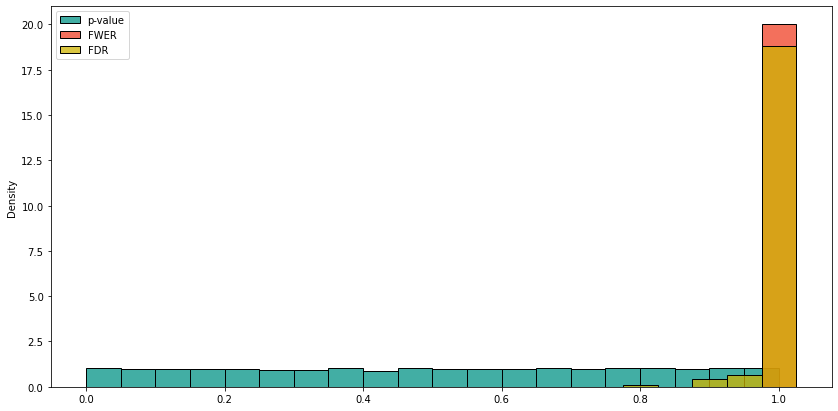

In [36]:
# imagine we perform 10 000 tests
pvals = []

N=10000
mean_difference=0
for i in range(N):
    t,pval = testTtest( n=sample_size , d=mean_difference , std=standard_dev ) 
    pvals.append(pval)
pvals = np.array(pvals)
# stats models proposes a function implementing numerous p-value correction methods
# https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html

from statsmodels.stats.multitest import multipletests

rejected,fwers,alphacSidak,alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni')
rejected,fdrs,alphacSidak,alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh')



fig,ax=plt.subplots(figsize=(14,7))
sns.histplot( pvals ,kde=False , stat = 'density', binwidth=0.05, ax = ax , color='xkcd:teal' , label = 'p-value')
sns.histplot( fwers ,kde=False , stat = 'density', binwidth=0.05, ax = ax , color='xkcd:tomato' , label = 'FWER')
sns.histplot( fdrs  ,kde=False , stat = 'density', binwidth=0.05, ax = ax , color='xkcd:mustard' , label = 'FDR')

print('Fraction of (spuriously) significant tests:')
print('p-value:' , sum(pvals<0.05)/N )
print('FWER   :' , sum(fwers<0.05)/N )
print('FDR    :' , sum(fdrs <0.05)/N )
plt.legend()